<a href="https://colab.research.google.com/github/PradeepKumar00786/Movie_Recommendation_System_Project_02/blob/main/Movie_Recommendation_System_Project_02_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MOVIE RECOMMENDATION SYSTEM
***

TABLE OF CONTANTS
***
1. business problem
2. objective
3. indroduction
4. type of recommendation engine
5. algorithoms
6. application
7. data cleaning
8. eda
9. simple recommendation engine
10. contant based recommendation engine
11. apriori algorithm based recommendation engine
12. collabrative (knn) algorithm based recommendation engine

# 1. BUSINESS PROBLEM
***
* **showing or recommending contant(product) relevent to user search or intreast that increase retansion time and increase sales**

# 2. OBJECTIVES
****
* **To clean data for better performance of model and EDA**
* **To perform EDA for getting insight**
* **To build movie Recommendation system that recommend movies based on similarity and watching behaviour**
* **To explore knowledge and skill**

# 3. INTRODUCTION
***
**A Recommender System predicts the possibility that a user would favor an item. Based on user search and former user interaction with the data source that the system takes the learning from (besides the data from other users, or historical trends), the system is capable of recommending an item to a user. Example Netflix recommend movies that they think we would like**

# 4. TYPES OF RECOMMENDATION
***
* **CONTENT BASED RECOMMENDATION**
Focus on the attributes of the items and give you recommendations based on the similarity between them. This ued very useful to recommend when user search. example when user search salman khan movies model recommend that movies in whin salman khan keyword matchs
* **APRIORI ALGORITHOM BASED RECOMMENDATION**
Apriori algorithm works on the principle of Association Rule Mining.
ssociation rule mining is a technique to identify underlying relations between different items. This relationship can be a similarity between items on how frequently they are bought or how similar users bought it.
* **COLLABRATIVE FILTTRING(CF)**
Produces recommendations based on the knowledge of users' attitude to the items. that it uses the "wisdom of crowds" to recommend items. You can think of this something like Amazon, based on other people's shopping experience Amazon will suggest items that you might enjoy.
Further can be divided into two parts:

    1. **Memory-Based Collaborative Filtering-**
The memory-based approach uses user rating data to compute the similarity between users or items. Typical examples of this approach are neighbourhood-based CF and item-based/user-based top-N recommendations. For example, in user based approaches, the value of ratings user u gives to item i is calculated as an aggregation of some similar users' rating of the item:

    2. **Model-Based Collaborating Filtering_**
In this approach, models are developed using different data mining, machine learning algorithms to predict users' rating of unrated items. There are many model-based CF algorithms. Bayesian networks, clustering models, latent semantic models such as singular value decomposition, probabilistic latent semantic analysis, multiple multiplicative factor, latent Dirichlet allocation and Markov decision process based models.

# 5. ALGORITHOMS
* ****
* **CONTANT BASED RECOMMENDATION** cosine similarity algorithm
* **APRIORI ALGORITHM BASED RECOMMENDATION** apriori algorithm
* **COLLABRETIVE FILTRING** KNN

# 6. APPLICATION
* **Use in social networking web for recommending post and profile relevent to user**
* **Use in e-commerce website for recommending relevent products**
* **Use in entertanment website for recommending relevent contant**
* **It's application in about every type of web**

# 7. DATA CLEANING
***
* **formating data in useable format**
* **droping unrelevent columns**
* **removing outlier using imputer of deletion**
* **generating new relevent feature(colums) based on existing columns**
* **removing null values**

In [1]:
#importing library
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#loading dataset
movie= pd.read_csv("/content/drive/MyDrive/Project_02/tmdb_5000_movies.csv")
movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
credits= pd.read_csv("/content/drive/MyDrive/Project_02/tmdb_5000_credits.csv")
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
#joing dataset
df=pd.merge(movie, credits, on="title", how="inner")
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [7]:
df=df[["budget", "popularity", "production_companies", "release_date", "revenue", "title", "movie_id", "overview", "genres", "keywords", "cast", "crew"]]
df.head()

,budget,popularity,production_companies,release_date,revenue,title,movie_id,overview,genres,keywords,cast,crew
0,237000000,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,Avatar,19995,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,Pirates of the Caribbean: At World's End,285,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,Spectre,206647,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,The Dark Knight Rises,49026,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,John Carter,49529,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
#importing abstract syntax trees (ast) library(module). this module is use for work with text data, convert in fatch able text
import ast

In [9]:
#function for extracting name value of text column is in dictionry like
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

In [10]:
#removing null values
df.dropna(inplace=True)

In [11]:
#applying function changing fomate and extracting only usable data
df['genres'] = df['genres'].apply(convert)
df['keywords'] = df['keywords'].apply(convert)
df.head()

,budget,popularity,production_companies,release_date,revenue,title,movie_id,overview,genres,keywords,cast,crew
0,237000000,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,Avatar,19995,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,Pirates of the Caribbean: At World's End,285,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,Spectre,206647,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,The Dark Knight Rises,49026,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,John Carter,49529,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
df["production_companies"][0]

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

In [13]:
#function to fetch particular data(name) from dictionary like data 
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 2:
            L.append(i['name'])
        counter+=1
    return L 

In [14]:
#appying function to fetch particular data at particular range
df["production_companies"]=df["production_companies"].apply(convert3)
df['cast'] = df['cast'].apply(convert3)
df.head()

,budget,popularity,production_companies,release_date,revenue,title,movie_id,overview,genres,keywords,cast,crew
0,237000000,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,2787965087,Avatar,19995,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films]",2007-05-19,961000000,Pirates of the Caribbean: At World's End,285,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,107.376788,"[Columbia Pictures, Danjaq]",2015-10-26,880674609,Spectre,206647,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,112.312950,"[Legendary Pictures, Warner Bros.]",2012-07-16,1084939099,The Dark Knight Rises,49026,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,43.926995,[Walt Disney Pictures],2012-03-07,284139100,John Carter,49529,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [15]:
df["production_companies"][0]

['Ingenious Film Partners', 'Twentieth Century Fox Film Corporation']

In [16]:
#function for fetch value on condition
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [17]:
df['crew'] = df['crew'].apply(fetch_director)

In [18]:
#function for removing space bitween words
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [19]:

df['cast'] = df['cast'].apply(collapse)
df['crew'] = df['crew'].apply(collapse)
df['genres'] = df['genres'].apply(collapse)
df['keywords'] = df['keywords'].apply(collapse)
df['production_companies'] = df['production_companies'].apply(collapse)
df.head()

,budget,popularity,production_companies,release_date,revenue,title,movie_id,overview,genres,keywords,cast,crew
0,237000000,150.437577,"[IngeniousFilmPartners, TwentiethCenturyFoxFil...",2009-12-10,2787965087,Avatar,19995,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana]",[JamesCameron]
1,300000000,139.082615,"[WaltDisneyPictures, JerryBruckheimerFilms]",2007-05-19,961000000,Pirates of the Caribbean: At World's End,285,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom]",[GoreVerbinski]
2,245000000,107.376788,"[ColumbiaPictures, Danjaq]",2015-10-26,880674609,Spectre,206647,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz]",[SamMendes]
3,250000000,112.312950,"[LegendaryPictures, WarnerBros.]",2012-07-16,1084939099,The Dark Knight Rises,49026,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine]",[ChristopherNolan]
4,260000000,43.926995,[WaltDisneyPictures],2012-03-07,284139100,John Carter,49529,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins]",[AndrewStanton]


In [20]:
df['overview'] = df['overview'].apply(lambda x:x.split())

In [21]:
df['tags'] = df['overview'] + df['genres'] + df['keywords'] + df['cast'] + df['crew']+df['production_companies']

In [22]:
df.head()

,budget,popularity,production_companies,release_date,revenue,title,movie_id,overview,genres,keywords,cast,crew,tags
0,237000000,150.437577,"[IngeniousFilmPartners, TwentiethCenturyFoxFil...",2009-12-10,2787965087,Avatar,19995,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,300000000,139.082615,"[WaltDisneyPictures, JerryBruckheimerFilms]",2007-05-19,961000000,Pirates of the Caribbean: At World's End,285,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,245000000,107.376788,"[ColumbiaPictures, Danjaq]",2015-10-26,880674609,Spectre,206647,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,250000000,112.312950,"[LegendaryPictures, WarnerBros.]",2012-07-16,1084939099,The Dark Knight Rises,49026,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,260000000,43.926995,[WaltDisneyPictures],2012-03-07,284139100,John Carter,49529,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


# 8. EDA
***
* **ploting distribution graph to see distribution of data**
* **ploting top n feature with respect to x variable(feature)**
* **ploting trend graph**
* **perform eda to find insights**

In [23]:
#importing library
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#creating new dataset that cantain only eda relevent attribute
df_eda=df[["budget", "popularity", "production_companies", "release_date", "revenue", "title", "genres", "cast", "crew"]]
df_eda.head()

,budget,popularity,production_companies,release_date,revenue,title,genres,cast,crew
0,237000000,150.437577,"[IngeniousFilmPartners, TwentiethCenturyFoxFil...",2009-12-10,2787965087,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[SamWorthington, ZoeSaldana]",[JamesCameron]
1,300000000,139.082615,"[WaltDisneyPictures, JerryBruckheimerFilms]",2007-05-19,961000000,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[JohnnyDepp, OrlandoBloom]",[GoreVerbinski]
2,245000000,107.376788,"[ColumbiaPictures, Danjaq]",2015-10-26,880674609,Spectre,"[Action, Adventure, Crime]","[DanielCraig, ChristophWaltz]",[SamMendes]
3,250000000,112.312950,"[LegendaryPictures, WarnerBros.]",2012-07-16,1084939099,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[ChristianBale, MichaelCaine]",[ChristopherNolan]
4,260000000,43.926995,[WaltDisneyPictures],2012-03-07,284139100,John Carter,"[Action, Adventure, ScienceFiction]","[TaylorKitsch, LynnCollins]",[AndrewStanton]


In [25]:
#applyin lambda function to convert into format
df_eda['crew'] = df_eda['crew'].apply(lambda x: " ".join(x))
df_eda['genres'] = df_eda['genres'].apply(lambda x: " ".join(x))
df_eda['cast'] = df_eda['cast'].apply(lambda x: " ".join(x))
df_eda['production_companies'] = df_eda['production_companies'].apply(lambda x: " ".join(x))
df_eda.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,budget,popularity,production_companies,release_date,revenue,title,genres,cast,crew
0,237000000,150.437577,IngeniousFilmPartners TwentiethCenturyFoxFilmC...,2009-12-10,2787965087,Avatar,Action Adventure Fantasy ScienceFiction,SamWorthington ZoeSaldana,JamesCameron
1,300000000,139.082615,WaltDisneyPictures JerryBruckheimerFilms,2007-05-19,961000000,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,JohnnyDepp OrlandoBloom,GoreVerbinski
2,245000000,107.376788,ColumbiaPictures Danjaq,2015-10-26,880674609,Spectre,Action Adventure Crime,DanielCraig ChristophWaltz,SamMendes
3,250000000,112.312950,LegendaryPictures WarnerBros.,2012-07-16,1084939099,The Dark Knight Rises,Action Crime Drama Thriller,ChristianBale MichaelCaine,ChristopherNolan
4,260000000,43.926995,WaltDisneyPictures,2012-03-07,284139100,John Carter,Action Adventure ScienceFiction,TaylorKitsch LynnCollins,AndrewStanton


In [26]:
#extracting month and year from release_date attribute
df_eda["year"]=pd.DatetimeIndex(df_eda['release_date']).year
df_eda['release_month']=pd.DatetimeIndex(df_eda['release_date']).month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
df_eda.head()

,budget,popularity,production_companies,release_date,revenue,title,genres,cast,crew,year,release_month
0,237000000,150.437577,IngeniousFilmPartners TwentiethCenturyFoxFilmC...,2009-12-10,2787965087,Avatar,Action Adventure Fantasy ScienceFiction,SamWorthington ZoeSaldana,JamesCameron,2009,12
1,300000000,139.082615,WaltDisneyPictures JerryBruckheimerFilms,2007-05-19,961000000,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,JohnnyDepp OrlandoBloom,GoreVerbinski,2007,5
2,245000000,107.376788,ColumbiaPictures Danjaq,2015-10-26,880674609,Spectre,Action Adventure Crime,DanielCraig ChristophWaltz,SamMendes,2015,10
3,250000000,112.312950,LegendaryPictures WarnerBros.,2012-07-16,1084939099,The Dark Knight Rises,Action Crime Drama Thriller,ChristianBale MichaelCaine,ChristopherNolan,2012,7
4,260000000,43.926995,WaltDisneyPictures,2012-03-07,284139100,John Carter,Action Adventure ScienceFiction,TaylorKitsch LynnCollins,AndrewStanton,2012,3


# 8.01 Distribution of movies year wise

In [28]:
unique_title= df_eda.drop_duplicates(['title'])
unique_title=unique_title["year"].value_counts()
unique_title.index

Int64Index([2009, 2014, 2006, 2013, 2008, 2010, 2011, 2005, 2015, 2012, 2004,
            2002, 2007, 2001, 1999, 2003, 2000, 1998, 1997, 2016, 1996, 1995,
            1994, 1993, 1992, 1981, 1989, 1987, 1988, 1991, 1990, 1984, 1985,
            1986, 1982, 1983, 1980, 1979, 1977, 1978, 1970, 1964, 1969, 1968,
            1971, 1976, 1973, 1972, 1965, 1963, 1974, 1962, 1975, 1961, 1940,
            1966, 1945, 1954, 1953, 1952, 1967, 1946, 1959, 1947, 1956, 1960,
            1939, 1948, 1951, 1938, 1933, 1929, 1942, 1955, 1936, 1949, 1957,
            1944, 1937, 1958, 1950, 2017, 1941, 1930, 1927, 1935, 1932, 1916,
            1934, 1925],
           dtype='int64')

In [29]:
unique_title.head(10)

2009    247
2014    237
2006    235
2013    231
2008    227
2010    225
2011    223
2005    217
2015    214
2012    208
Name: year, dtype: int64

In [30]:
y=unique_title
x=unique_title.index

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'no of movies'), Text(0.5, 0, 'year')]

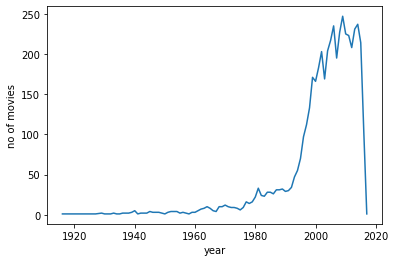

In [31]:
g=sns.lineplot(x,y)
g.set(xlabel ="year", ylabel = "no of movies")

# 8.02 year wise hit movies or blockbuster movies

In [32]:
top_revenue = df_eda.sort_values(by='revenue', ascending=False)
top_revenue.head()

,budget,popularity,production_companies,release_date,revenue,title,genres,cast,crew,year,release_month
0,237000000,150.437577,IngeniousFilmPartners TwentiethCenturyFoxFilmC...,2009-12-10,2787965087,Avatar,Action Adventure Fantasy ScienceFiction,SamWorthington ZoeSaldana,JamesCameron,2009,12
25,200000000,100.025899,ParamountPictures TwentiethCenturyFoxFilmCorpo...,1997-11-18,1845034188,Titanic,Drama Romance Thriller,KateWinslet LeonardoDiCaprio,JamesCameron,1997,11
16,220000000,144.448633,ParamountPictures MarvelStudios,2012-04-25,1519557910,The Avengers,ScienceFiction Action Adventure,RobertDowneyJr. ChrisEvans,JossWhedon,2012,4
28,150000000,418.708552,UniversalStudios AmblinEntertainment,2015-06-09,1513528810,Jurassic World,Action Adventure ScienceFiction Thriller,ChrisPratt BryceDallasHoward,ColinTrevorrow,2015,6
44,190000000,102.322217,UniversalPictures OriginalFilm,2015-04-01,1506249360,Furious 7,Action,VinDiesel PaulWalker,JamesWan,2015,4


In [33]:
top_revenue.head(10)

,budget,popularity,production_companies,release_date,revenue,title,genres,cast,crew,year,release_month
0,237000000,150.437577,IngeniousFilmPartners TwentiethCenturyFoxFilmC...,2009-12-10,2787965087,Avatar,Action Adventure Fantasy ScienceFiction,SamWorthington ZoeSaldana,JamesCameron,2009,12
25,200000000,100.025899,ParamountPictures TwentiethCenturyFoxFilmCorpo...,1997-11-18,1845034188,Titanic,Drama Romance Thriller,KateWinslet LeonardoDiCaprio,JamesCameron,1997,11
16,220000000,144.448633,ParamountPictures MarvelStudios,2012-04-25,1519557910,The Avengers,ScienceFiction Action Adventure,RobertDowneyJr. ChrisEvans,JossWhedon,2012,4
28,150000000,418.708552,UniversalStudios AmblinEntertainment,2015-06-09,1513528810,Jurassic World,Action Adventure ScienceFiction Thriller,ChrisPratt BryceDallasHoward,ColinTrevorrow,2015,6
44,190000000,102.322217,UniversalPictures OriginalFilm,2015-04-01,1506249360,Furious 7,Action,VinDiesel PaulWalker,JamesWan,2015,4
7,280000000,134.279229,MarvelStudios PrimeFocus,2015-04-22,1405403694,Avengers: Age of Ultron,Action Adventure ScienceFiction,RobertDowneyJr. ChrisHemsworth,JossWhedon,2015,4
124,150000000,165.125366,WaltDisneyPictures WaltDisneyAnimationStudios,2013-11-27,1274219009,Frozen,Animation Adventure Family,KristenBell IdinaMenzel,ChrisBuck JenniferLee,2013,11
31,200000000,77.682080,MarvelStudios,2013-04-18,1215439994,Iron Man 3,Action Adventure ScienceFiction,RobertDowneyJr. GwynethPaltrow,ShaneBlack,2013,4
546,74000000,875.581305,UniversalPictures IlluminationEntertainment,2015-06-17,1156730962,Minions,Family Animation Adventure Comedy,SandraBullock JonHamm,KyleBalda PierreCoffin,2015,6
26,250000000,198.372395,StudioBabelsberg MarvelStudios,2016-04-27,1153304495,Captain America: Civil War,Adventure Action ScienceFiction,ChrisEvans RobertDowneyJr.,AnthonyRusso JoeRusso,2016,4


In [34]:
top_revenue2=top_revenue.drop_duplicates(subset='year', keep='first', inplace=False)

In [35]:
top_revenue2.head(10)

,budget,popularity,production_companies,release_date,revenue,title,genres,cast,crew,year,release_month
0,237000000,150.437577,IngeniousFilmPartners TwentiethCenturyFoxFilmC...,2009-12-10,2787965087,Avatar,Action Adventure Fantasy ScienceFiction,SamWorthington ZoeSaldana,JamesCameron,2009,12
25,200000000,100.025899,ParamountPictures TwentiethCenturyFoxFilmCorpo...,1997-11-18,1845034188,Titanic,Drama Romance Thriller,KateWinslet LeonardoDiCaprio,JamesCameron,1997,11
16,220000000,144.448633,ParamountPictures MarvelStudios,2012-04-25,1519557910,The Avengers,ScienceFiction Action Adventure,RobertDowneyJr. ChrisEvans,JossWhedon,2012,4
28,150000000,418.708552,UniversalStudios AmblinEntertainment,2015-06-09,1513528810,Jurassic World,Action Adventure ScienceFiction Thriller,ChrisPratt BryceDallasHoward,ColinTrevorrow,2015,6
124,150000000,165.125366,WaltDisneyPictures WaltDisneyAnimationStudios,2013-11-27,1274219009,Frozen,Animation Adventure Family,KristenBell IdinaMenzel,ChrisBuck JenniferLee,2013,11
26,250000000,198.372395,StudioBabelsberg MarvelStudios,2016-04-27,1153304495,Captain America: Civil War,Adventure Action ScienceFiction,ChrisEvans RobertDowneyJr.,AnthonyRusso JoeRusso,2016,4
52,195000000,28.529607,ParamountPictures DiBonaventuraPictures,2011-06-28,1123746996,Transformers: Dark of the Moon,Action ScienceFiction Adventure,ShiaLaBeouf JohnMalkovich,MichaelBay,2011,6
329,94000000,123.630332,WingNutFilms NewLineCinema,2003-12-01,1118888979,The Lord of the Rings: The Return of the King,Adventure Fantasy Action,ElijahWood IanMcKellen,PeterJackson,2003,12
36,210000000,116.840296,ParamountPictures AmblinEntertainment,2014-06-25,1091405097,Transformers: Age of Extinction,ScienceFiction Action Adventure,MarkWahlberg StanleyTucci,MichaelBay,2014,6
42,200000000,59.995418,WaltDisneyPictures PixarAnimationStudios,2010-06-16,1066969703,Toy Story 3,Animation Family Comedy,TomHanks TimAllen,LeeUnkrich,2010,6


In [36]:
top_revenue2=top_revenue2.sort_values(by=['year'], ascending=False)[:10]
top_revenue2= top_revenue2[['year', 'title', 'revenue']].head(10)

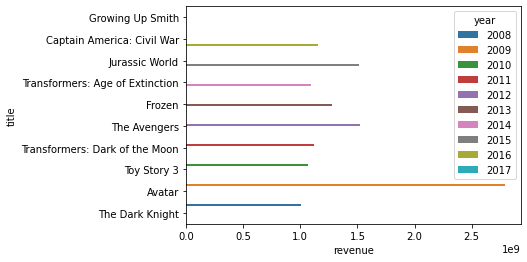

In [37]:
sns.barplot(data=top_revenue, x=top_revenue2['revenue'], y=top_revenue2['title'], hue=top_revenue2["year"])

# 8.03 Distribution of movies month wise

In [38]:
df_eda_month=df_eda[['title','release_month']]
df_eda_month.groupby(['release_month']).size()

release_month
1     382
2     326
3     373
4     349
5     364
6     390
7     365
8     413
9     588
10    475
11    326
12    454
dtype: int64

[Text(0, 0.5, 'no of movies'), Text(0.5, 0, 'release month')]

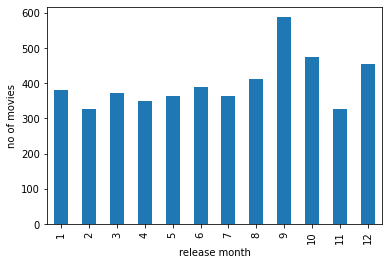

In [39]:
g2=df_eda_month.groupby(['release_month']).size().plot(kind = "bar")
g2.set(xlabel ="release month", ylabel = "no of movies")

1. **insight**
there are much movie release in sep, oct and dec and less movie release in feb, april and nov so release new movie in feb, april or nov if you want low compatiton

# 8.2 Distribution movie's revenue month wise

In [40]:
revenue_month=df_eda[['title','revenue','release_month']]
revenue_month=revenue_month.sort_values(by='revenue', ascending=False)
revenue_month.head()

,title,revenue,release_month
0,Avatar,2787965087,12
25,Titanic,1845034188,11
16,The Avengers,1519557910,4
28,Jurassic World,1513528810,6
44,Furious 7,1506249360,4


[Text(0, 0.5, 'average revenue'), Text(0.5, 0, 'release month')]

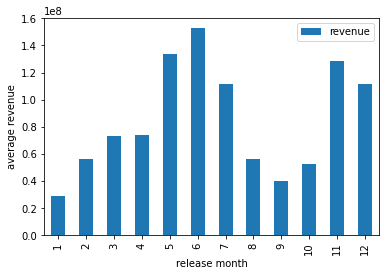

In [41]:
g3=revenue_month.groupby(['release_month']).mean().plot(kind = "bar")
g3.set(xlabel ="release month", ylabel = "average revenue")

2. **insight** may, june and nov has high revenue and jan, feb, sep, aug, oct has low revenue so we should avoid releasing movies in jan, feb, sep, aug, oct

# 8.3 Top 100 revenue earned movies month wise

In [42]:
revenue_month2=revenue_month[:100]
revenue_month2.head(10)

,title,revenue,release_month
0,Avatar,2787965087,12
25,Titanic,1845034188,11
16,The Avengers,1519557910,4
28,Jurassic World,1513528810,6
44,Furious 7,1506249360,4
7,Avengers: Age of Ultron,1405403694,4
124,Frozen,1274219009,11
31,Iron Man 3,1215439994,4
546,Minions,1156730962,6
26,Captain America: Civil War,1153304495,4


[Text(0, 0.5, 'average revenue'), Text(0.5, 0, 'release month')]

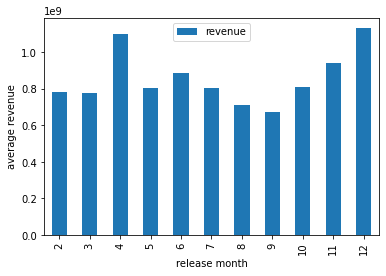

In [43]:
g4=revenue_month2.groupby(['release_month']).mean().plot(kind = "bar")
g4.set(xlabel ="release month", ylabel = "average revenue")

# 8.4 Top 100 revenue earned movies distribution month wise

[Text(0, 0.5, 'no. of movies'), Text(0.5, 0, 'release month')]

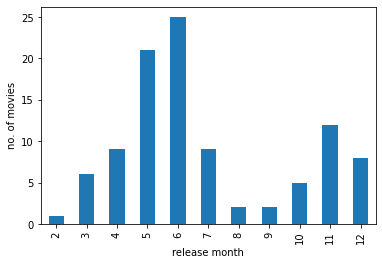

In [44]:
g5=revenue_month2.groupby(['release_month']).size().plot(kind = "bar")
g5.set(xlabel ="release month", ylabel = "no. of movies")

3. **insight** maximum hit movies released in may, april, nov

1. **insight**
there are much movie release in sep, oct and dec and less movie release in feb, april and nov so release new movie in feb, april or nov if you want low compatiton
2. **insight**
may, june and nov has high revenue and jan, feb, sep, aug, oct has low revenue so we should avoid releasing movies in jan, feb, sep, aug, oct
3. **insight** 
in top 100 movies maximum hit movies released in may, april, nov
**combining tree insights:**   
**april and nov is best month to release movie because in this month there are high probability to low competition and high revenue**

# 8.5 Top 10 most frequent production companies

In [45]:
production_value_counts = df_eda['production_companies'].str.split(',', expand=True).stack().value_counts()

In [46]:
x=production_value_counts[1:10]
x

ParamountPictures                     58
UniversalPictures                     45
NewLineCinema                         38
ColumbiaPictures                      37
Metro-Goldwyn-Mayer(MGM)              32
TwentiethCenturyFoxFilmCorporation    31
WaltDisneyPictures                    27
WarnerBros.                           27
TouchstonePictures                    26
dtype: int64

In [47]:
y=production_value_counts.index[1:10]
y

Index(['ParamountPictures', 'UniversalPictures', 'NewLineCinema',
       'ColumbiaPictures', 'Metro-Goldwyn-Mayer(MGM)',
       'TwentiethCenturyFoxFilmCorporation', 'WaltDisneyPictures',
       'WarnerBros.', 'TouchstonePictures'],
      dtype='object')

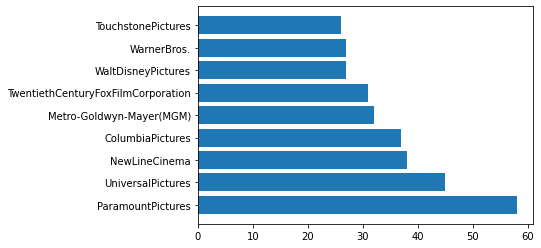

In [48]:
g5=plt.barh(y,x)
plt.xlabel=('no. of movies')
plt.ylabel=('production companies')

# 8.6 Top 10 most frequent  movie genres

In [49]:
genres_value_counts = df_eda['genres'].str.split(',', expand=True).stack().value_counts()

In [50]:
genres_value_counts.head(10)

Drama                   371
Comedy                  282
Drama Romance           164
Comedy Romance          144
Comedy Drama            142
Comedy Drama Romance    109
Horror Thriller          88
Documentary              66
Horror                   64
Drama Thriller           62
dtype: int64

In [51]:
y=genres_value_counts[:10]

In [52]:
x=genres_value_counts.index[:10]

<BarContainer object of 10 artists>

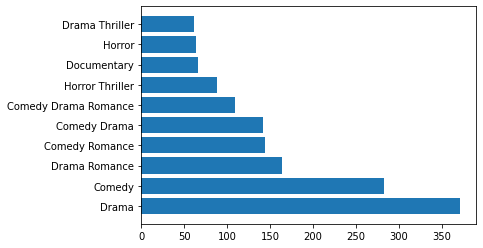

In [53]:
plt.barh(x,y)

# 8.7 Top 10 high budget movies

In [54]:
top_budget = df_eda.sort_values(by='budget', ascending=False)
top_budget.head()

,budget,popularity,production_companies,release_date,revenue,title,genres,cast,crew,year,release_month
17,380000000,135.413856,WaltDisneyPictures JerryBruckheimerFilms,2011-05-14,1045713802,Pirates of the Caribbean: On Stranger Tides,Adventure Action Fantasy,JohnnyDepp PenélopeCruz,RobMarshall,2011,5
1,300000000,139.082615,WaltDisneyPictures JerryBruckheimerFilms,2007-05-19,961000000,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,JohnnyDepp OrlandoBloom,GoreVerbinski,2007,5
7,280000000,134.279229,MarvelStudios PrimeFocus,2015-04-22,1405403694,Avengers: Age of Ultron,Action Adventure ScienceFiction,RobertDowneyJr. ChrisHemsworth,JossWhedon,2015,4
10,270000000,57.925623,DCComics LegendaryPictures,2006-06-28,391081192,Superman Returns,Adventure Fantasy Action ScienceFiction,BrandonRouth KevinSpacey,BryanSinger,2006,6
4,260000000,43.926995,WaltDisneyPictures,2012-03-07,284139100,John Carter,Action Adventure ScienceFiction,TaylorKitsch LynnCollins,AndrewStanton,2012,3


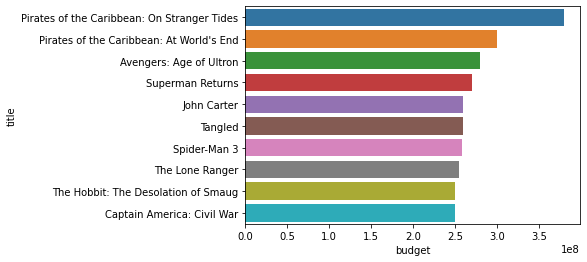

In [55]:
sns.barplot(y=top_budget['title'][:10], x=top_budget['budget'][:10], data = top_budget)

# 8.8 Top 10 high revenue earned movies

In [56]:
top_revenue = df_eda.sort_values(by='revenue', ascending=False)
top_revenue.head()

,budget,popularity,production_companies,release_date,revenue,title,genres,cast,crew,year,release_month
0,237000000,150.437577,IngeniousFilmPartners TwentiethCenturyFoxFilmC...,2009-12-10,2787965087,Avatar,Action Adventure Fantasy ScienceFiction,SamWorthington ZoeSaldana,JamesCameron,2009,12
25,200000000,100.025899,ParamountPictures TwentiethCenturyFoxFilmCorpo...,1997-11-18,1845034188,Titanic,Drama Romance Thriller,KateWinslet LeonardoDiCaprio,JamesCameron,1997,11
16,220000000,144.448633,ParamountPictures MarvelStudios,2012-04-25,1519557910,The Avengers,ScienceFiction Action Adventure,RobertDowneyJr. ChrisEvans,JossWhedon,2012,4
28,150000000,418.708552,UniversalStudios AmblinEntertainment,2015-06-09,1513528810,Jurassic World,Action Adventure ScienceFiction Thriller,ChrisPratt BryceDallasHoward,ColinTrevorrow,2015,6
44,190000000,102.322217,UniversalPictures OriginalFilm,2015-04-01,1506249360,Furious 7,Action,VinDiesel PaulWalker,JamesWan,2015,4


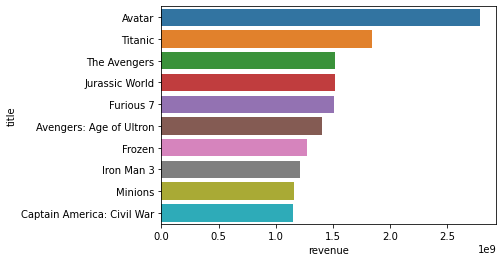

In [57]:
sns.barplot(y=top_revenue['title'][:10], x=top_revenue['revenue'][:10], data = top_revenue)

# 8.9 Top 10 most revenue earned movie's crew(director)

In [58]:
top_revenue = df_eda.sort_values(by='revenue', ascending=False)
top_revenue.head(10)

,budget,popularity,production_companies,release_date,revenue,title,genres,cast,crew,year,release_month
0,237000000,150.437577,IngeniousFilmPartners TwentiethCenturyFoxFilmC...,2009-12-10,2787965087,Avatar,Action Adventure Fantasy ScienceFiction,SamWorthington ZoeSaldana,JamesCameron,2009,12
25,200000000,100.025899,ParamountPictures TwentiethCenturyFoxFilmCorpo...,1997-11-18,1845034188,Titanic,Drama Romance Thriller,KateWinslet LeonardoDiCaprio,JamesCameron,1997,11
16,220000000,144.448633,ParamountPictures MarvelStudios,2012-04-25,1519557910,The Avengers,ScienceFiction Action Adventure,RobertDowneyJr. ChrisEvans,JossWhedon,2012,4
28,150000000,418.708552,UniversalStudios AmblinEntertainment,2015-06-09,1513528810,Jurassic World,Action Adventure ScienceFiction Thriller,ChrisPratt BryceDallasHoward,ColinTrevorrow,2015,6
44,190000000,102.322217,UniversalPictures OriginalFilm,2015-04-01,1506249360,Furious 7,Action,VinDiesel PaulWalker,JamesWan,2015,4
7,280000000,134.279229,MarvelStudios PrimeFocus,2015-04-22,1405403694,Avengers: Age of Ultron,Action Adventure ScienceFiction,RobertDowneyJr. ChrisHemsworth,JossWhedon,2015,4
124,150000000,165.125366,WaltDisneyPictures WaltDisneyAnimationStudios,2013-11-27,1274219009,Frozen,Animation Adventure Family,KristenBell IdinaMenzel,ChrisBuck JenniferLee,2013,11
31,200000000,77.682080,MarvelStudios,2013-04-18,1215439994,Iron Man 3,Action Adventure ScienceFiction,RobertDowneyJr. GwynethPaltrow,ShaneBlack,2013,4
546,74000000,875.581305,UniversalPictures IlluminationEntertainment,2015-06-17,1156730962,Minions,Family Animation Adventure Comedy,SandraBullock JonHamm,KyleBalda PierreCoffin,2015,6
26,250000000,198.372395,StudioBabelsberg MarvelStudios,2016-04-27,1153304495,Captain America: Civil War,Adventure Action ScienceFiction,ChrisEvans RobertDowneyJr.,AnthonyRusso JoeRusso,2016,4


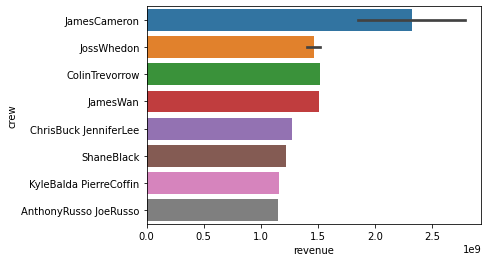

In [59]:
sns.barplot(y=top_revenue['crew'][:10], x=top_revenue['revenue'][:10], data = top_revenue)

**insight** james Cameron's to movie is in top 10 so he is preferable director

# 8.10 Top 10 popularity movies

In [60]:
top_popularity = df_eda.sort_values(by='popularity', ascending=False)
top_popularity.head(10)

,budget,popularity,production_companies,release_date,revenue,title,genres,cast,crew,year,release_month
546,74000000,875.581305,UniversalPictures IlluminationEntertainment,2015-06-17,1156730962,Minions,Family Animation Adventure Comedy,SandraBullock JonHamm,KyleBalda PierreCoffin,2015,6
95,165000000,724.247784,ParamountPictures LegendaryPictures,2014-11-05,675120017,Interstellar,Adventure Drama ScienceFiction,MatthewMcConaughey JessicaChastain,ChristopherNolan,2014,11
788,58000000,514.569956,TwentiethCenturyFoxFilmCorporation MarvelEnter...,2016-02-09,783112979,Deadpool,Action Adventure Comedy,RyanReynolds MorenaBaccarin,TimMiller,2016,2
94,170000000,481.098624,MarvelStudios MovingPictureCompany(MPC),2014-07-30,773328629,Guardians of the Galaxy,Action ScienceFiction Adventure,ChrisPratt ZoeSaldana,JamesGunn,2014,7
127,150000000,434.278564,VillageRoadshowPictures KennedyMillerProductions,2015-05-13,378858340,Mad Max: Fury Road,Action Adventure ScienceFiction Thriller,TomHardy CharlizeTheron,GeorgeMiller,2015,5
28,150000000,418.708552,UniversalStudios AmblinEntertainment,2015-06-09,1513528810,Jurassic World,Action Adventure ScienceFiction Thriller,ChrisPratt BryceDallasHoward,ColinTrevorrow,2015,6
199,140000000,271.972889,WaltDisneyPictures JerryBruckheimerFilms,2003-07-09,655011224,Pirates of the Caribbean: The Curse of the Bla...,Adventure Fantasy Action,JohnnyDepp GeoffreyRush,GoreVerbinski,2003,7
82,170000000,243.791743,IngeniousMedia CherninEntertainment,2014-06-26,710644566,Dawn of the Planet of the Apes,ScienceFiction Action Drama Thriller,AndySerkis JasonClarke,MattReeves,2014,6
200,125000000,206.227151,Lionsgate ColorForce,2014-11-18,752100229,The Hunger Games: Mockingjay - Part 1,ScienceFiction Adventure Thriller,JenniferLawrence JoshHutcherson,FrancisLawrence,2014,11
88,165000000,203.734590,WaltDisneyPictures WaltDisneyAnimationStudios,2014-10-24,652105443,Big Hero 6,Adventure Family Animation Action Comedy,ScottAdsit RyanPotter,ChrisWilliams DonHall,2014,10


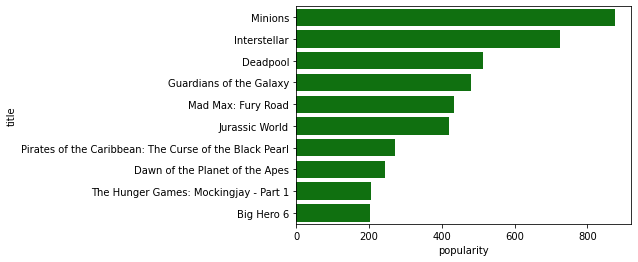

In [61]:
sns.barplot(y=top_popularity['title'][:10], x=top_popularity['popularity'][:10], data = top_revenue, color='green')

#  8.11 Top 10 director who made  movies

In [62]:
 df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4805 entries, 0 to 4808
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4805 non-null   int64  
 1   popularity            4805 non-null   float64
 2   production_companies  4805 non-null   object 
 3   release_date          4805 non-null   object 
 4   revenue               4805 non-null   int64  
 5   title                 4805 non-null   object 
 6   genres                4805 non-null   object 
 7   cast                  4805 non-null   object 
 8   crew                  4805 non-null   object 
 9   year                  4805 non-null   int64  
 10  release_month         4805 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 579.5+ KB


In [63]:
crew_value_counts = df_eda['crew'].value_counts()
x = crew_value_counts[1:10]
y = crew_value_counts.index[1:10]

In [64]:
crew_value_counts.head(10)

                    29
StevenSpielberg     26
WoodyAllen          21
MartinScorsese      20
ClintEastwood       20
SpikeLee            16
RidleyScott         16
RennyHarlin         15
StevenSoderbergh    15
TimBurton           14
Name: crew, dtype: int64

<BarContainer object of 9 artists>

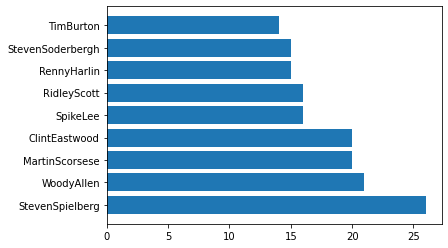

In [65]:
plt.barh(y,x)

# 8.12 Top 10 most revenue earned movie's director

In [66]:
top_revenue.head(10)

,budget,popularity,production_companies,release_date,revenue,title,genres,cast,crew,year,release_month
0,237000000,150.437577,IngeniousFilmPartners TwentiethCenturyFoxFilmC...,2009-12-10,2787965087,Avatar,Action Adventure Fantasy ScienceFiction,SamWorthington ZoeSaldana,JamesCameron,2009,12
25,200000000,100.025899,ParamountPictures TwentiethCenturyFoxFilmCorpo...,1997-11-18,1845034188,Titanic,Drama Romance Thriller,KateWinslet LeonardoDiCaprio,JamesCameron,1997,11
16,220000000,144.448633,ParamountPictures MarvelStudios,2012-04-25,1519557910,The Avengers,ScienceFiction Action Adventure,RobertDowneyJr. ChrisEvans,JossWhedon,2012,4
28,150000000,418.708552,UniversalStudios AmblinEntertainment,2015-06-09,1513528810,Jurassic World,Action Adventure ScienceFiction Thriller,ChrisPratt BryceDallasHoward,ColinTrevorrow,2015,6
44,190000000,102.322217,UniversalPictures OriginalFilm,2015-04-01,1506249360,Furious 7,Action,VinDiesel PaulWalker,JamesWan,2015,4
7,280000000,134.279229,MarvelStudios PrimeFocus,2015-04-22,1405403694,Avengers: Age of Ultron,Action Adventure ScienceFiction,RobertDowneyJr. ChrisHemsworth,JossWhedon,2015,4
124,150000000,165.125366,WaltDisneyPictures WaltDisneyAnimationStudios,2013-11-27,1274219009,Frozen,Animation Adventure Family,KristenBell IdinaMenzel,ChrisBuck JenniferLee,2013,11
31,200000000,77.682080,MarvelStudios,2013-04-18,1215439994,Iron Man 3,Action Adventure ScienceFiction,RobertDowneyJr. GwynethPaltrow,ShaneBlack,2013,4
546,74000000,875.581305,UniversalPictures IlluminationEntertainment,2015-06-17,1156730962,Minions,Family Animation Adventure Comedy,SandraBullock JonHamm,KyleBalda PierreCoffin,2015,6
26,250000000,198.372395,StudioBabelsberg MarvelStudios,2016-04-27,1153304495,Captain America: Civil War,Adventure Action ScienceFiction,ChrisEvans RobertDowneyJr.,AnthonyRusso JoeRusso,2016,4


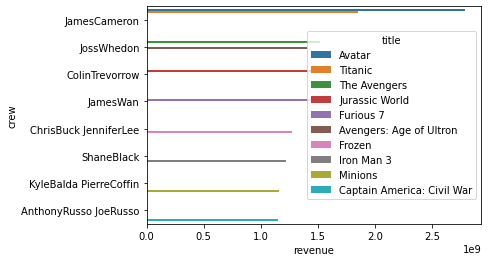

In [67]:
sns.barplot(data=top_revenue[:10], x='revenue', y='crew', hue='title')

# 8.13 Top 10 revenue movies production companies

In [68]:
revenue_comp=top_revenue[["production_companies", "title", "revenue"]]

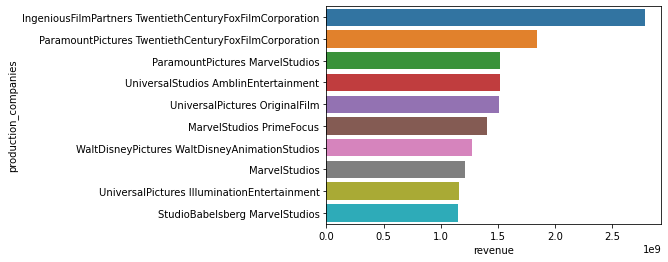

In [69]:
sns.barplot(data=revenue_comp[:10], x='revenue', y= 'production_companies')

# 8.14 Top high avg revenue by crew

In [70]:
df_eda.shape

(4805, 11)

In [71]:
avg_crew=df_eda.groupby("crew")["revenue"].mean()

In [72]:
avg_crew.head(10)

crew
                                 9.561138e+04
AaronHann MarioMiscione          0.000000e+00
AaronSchneider                   0.000000e+00
AbelFerrara                      1.227324e+06
AdamBrooks                       5.544797e+07
AdamCarolla KevinHench           0.000000e+00
AdamGoldberg                     0.000000e+00
AdamGreen                        0.000000e+00
AdamJayEpstein AndrewJacobson    0.000000e+00
AdamMarcus                       1.593806e+07
Name: revenue, dtype: float64

In [73]:
avg_crew=avg_crew.nlargest(10)

In [74]:
avg_crew.index

Index(['ChrisBuck JenniferLee', 'KyleBalda PierreCoffin', 'LeeUnkrich',
       'JossWhedon', 'AndrewAdamson KellyAsbury ConradVernon',
       'SteveMartino MikeThurmeier', 'ChrisRenaud', 'JamesCameron',
       'ChrisMiller RamanHui', 'RogerAllers RobMinkoff'],
      dtype='object', name='crew')

In [75]:
avg_crew

crew
ChrisBuck JenniferLee                     1.274219e+09
KyleBalda PierreCoffin                    1.156731e+09
LeeUnkrich                                1.066970e+09
JossWhedon                                9.879437e+08
AndrewAdamson KellyAsbury ConradVernon    9.198388e+08
SteveMartino MikeThurmeier                8.772448e+08
ChrisRenaud                               8.759583e+08
JamesCameron                              8.405099e+08
ChrisMiller RamanHui                      7.989582e+08
RogerAllers RobMinkoff                    7.882418e+08
Name: revenue, dtype: float64

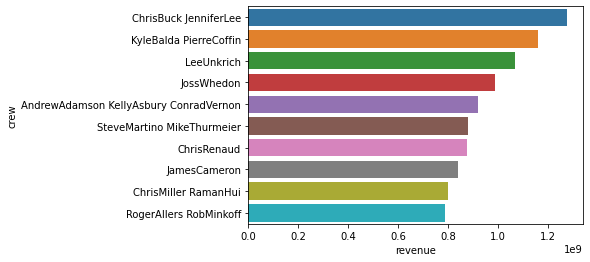

In [76]:
sns.barplot(x=avg_crew, y=avg_crew.index)

# 8.15 Top avg revenue earned production company

In [77]:
avg_prodc=df_eda.groupby("production_companies")["revenue"].mean()

In [78]:
avg_prodc=avg_prodc.nlargest(10)

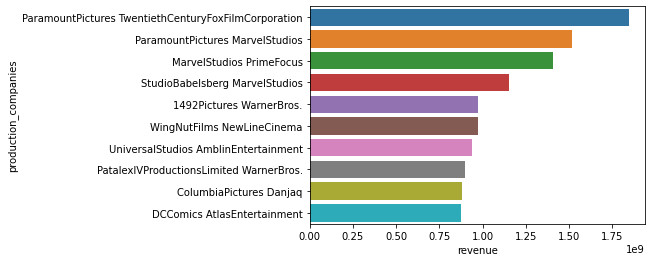

In [79]:
sns.barplot(y=avg_prodc.index, x=avg_prodc)

**insight** production_companies, MarvelStudios PrimeFocus and fox film corporation has high chance to hit movie

# 8.16 Top 10 crew avg budget wise

In [80]:
avg_budget_crew=df_eda.groupby("crew")["budget"].mean()

In [81]:
avg_budget_crew=avg_budget_crew.nlargest(10)

In [82]:
#avg_budget_crew

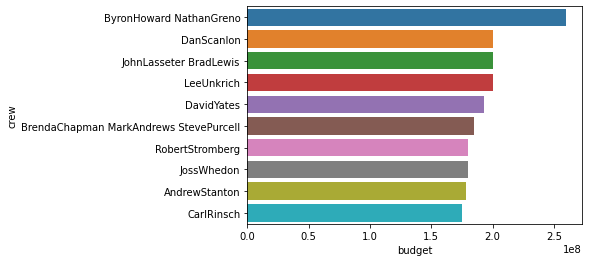

In [83]:
sns.barplot(x=avg_budget_crew, y=avg_budget_crew.index)

# 8.17 Top 10 production companies avg budget wise

In [84]:
avg_budget_prodc=df_eda.groupby("production_companies")["budget"].mean()

In [85]:
avg_budget_prodc=avg_budget_prodc.nlargest(10)

In [86]:
avg_budget_prodc

production_companies
MarvelStudios PrimeFocus                       2.800000e+08
DCComics AtlasEntertainment                    2.500000e+08
StudioBabelsberg MarvelStudios                 2.500000e+08
ColumbiaPictures Danjaq                        2.450000e+08
AmblinEntertainment MediaMagikEntertainment    2.250000e+08
ColumbiaPictures LauraZiskinProductions        2.243333e+08
ParamountPictures MarvelStudios                2.200000e+08
UniversalPictures Hasbro                       2.090000e+08
WingNutFilms UniversalPictures                 2.070000e+08
WaltDisney WaldenMedia                         2.025000e+08
Name: budget, dtype: float64

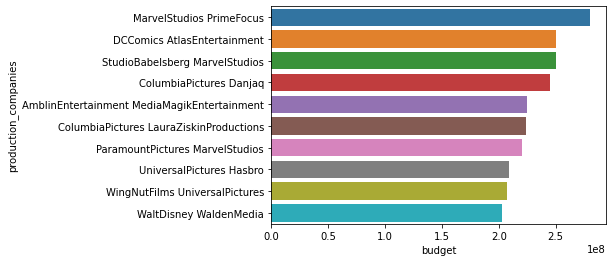

In [87]:
sns.barplot(x=avg_budget_prodc, y=avg_budget_prodc.index)

# 9. SIMPLE RECOMMENDATION SYSTEM FOR HOME PAGE
***

In [88]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [89]:
movie_df=movie

In [90]:
movie_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [91]:
vote_counts = movie_df[movie_df['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = movie_df[movie_df['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
C

5.6529252550489275

In [92]:
m = vote_counts.quantile(0.95)
m

3040.8999999999996

In [93]:
movie_df["year"]=pd.DatetimeIndex(movie_df['release_date']).year

In [94]:
qualified = movie_df[(movie_df['vote_count'] >= m) & (movie_df['vote_count'].notnull()) & (movie_df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified.shape

(241, 6)

In [95]:
qualified.head()

,title,year,vote_count,vote_average,popularity,genres
0,Avatar,2009.0,11800,7,150.437577,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,Pirates of the Caribbean: At World's End,2007.0,4500,6,139.082615,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,Spectre,2015.0,4466,6,107.376788,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,The Dark Knight Rises,2012.0,9106,7,112.312950,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
5,Spider-Man 3,2007.0,3576,5,115.699814,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na..."


In [96]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [97]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)

In [98]:
qualified = qualified.sort_values('wr', ascending=False).head(250)

In [99]:
qualified.head(15)

,title,year,vote_count,vote_average,popularity,genres,wr
96,Inception,2010.0,13752,8,167.583710,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",7.574986
65,The Dark Knight,2008.0,12002,8,187.322927,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",7.525542
95,Interstellar,2014.0,10867,8,724.247784,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",7.486823
662,Fight Club,1999.0,9413,8,146.757391,"[{""id"": 18, ""name"": ""Drama""}]",7.426909
262,The Lord of the Rings: The Fellowship of the Ring,2001.0,8705,8,138.049577,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",7.392365
3232,Pulp Fiction,1994.0,8428,8,121.463076,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",7.377689
1881,The Shawshank Redemption,1994.0,8205,8,136.747729,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",7.365349
329,The Lord of the Rings: The Return of the King,2003.0,8064,8,123.630332,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",7.357291
809,Forrest Gump,1994.0,7927,8,138.133331,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",7.349263
330,The Lord of the Rings: The Two Towers,2002.0,7487,8,106.914973,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",7.322066


# 10. CONTANT BASED RECOMMENDATION ENGINE
***

In [100]:
df2=df[["movie_id", "title", "tags"]]

In [101]:
df2.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [102]:
df2['tags'] = df2['tags'].apply(lambda x: " ".join(x))
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [103]:
df2.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [104]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
vector = cv.fit_transform(df2['tags']).toarray()

In [105]:
vector.shape

(4805, 5000)

In [106]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.08471737, 0.05827165, ..., 0.0244558 , 0.02597622,
        0.        ],
       [0.08471737, 1.        , 0.06253054, ..., 0.02624319, 0.        ,
        0.        ],
       [0.05827165, 0.06253054, 1.        , ..., 0.02707652, 0.        ,
        0.        ],
       ...,
       [0.0244558 , 0.02624319, 0.02707652, ..., 1.        , 0.07242068,
        0.0489116 ],
       [0.02597622, 0.        , 0.        , ..., 0.07242068, 1.        ,
        0.05195243],
       [0.        , 0.        , 0.        , ..., 0.0489116 , 0.05195243,
        1.        ]])

In [107]:
pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
from fuzzywuzzy import process

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [109]:
df2[df2['title'] == 'The Lego Movie'].index[0]
def recommend(movie):
    index = process.extractOne(movie , df2['title'])[2]   #df2[df2['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[0:6]:
        print(df2.iloc[i[0]].title)
        
    
recommend('Batman Return')

Batman Returns
The Dark Knight Rises
The Dark Knight
Batman
Batman & Robin
Batman


# 11. APRIORI ALGORITHIOM BASED RECOMMENDATION ENGINE
***

In [110]:
rating= pd.read_csv("/content/drive/MyDrive/Project_02/ratings.csv")

In [111]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [112]:
rating.rename(columns = {'movieId':'movie_id'}, inplace = True)

In [113]:
rating.head()

,userId,movie_id,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [114]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movie_id   100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [115]:
df3=pd.merge(rating, df, on='movie_id', how='inner')

In [116]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16731 entries, 0 to 16730
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userId                16731 non-null  int64  
 1   movie_id              16731 non-null  int64  
 2   rating                16731 non-null  float64
 3   timestamp             16731 non-null  int64  
 4   budget                16731 non-null  int64  
 5   popularity            16731 non-null  float64
 6   production_companies  16731 non-null  object 
 7   release_date          16731 non-null  object 
 8   revenue               16731 non-null  int64  
 9   title                 16731 non-null  object 
 10  overview              16731 non-null  object 
 11  genres                16731 non-null  object 
 12  keywords              16731 non-null  object 
 13  cast                  16731 non-null  object 
 14  crew                  16731 non-null  object 
 15  tags               

In [117]:
df3.head()

,userId,movie_id,rating,timestamp,budget,popularity,production_companies,release_date,revenue,title,overview,genres,keywords,cast,crew,tags
0,1,70,3.0,964982400,30000000,70.456012,"[LakeshoreEntertainment, MalpasoProductions]",2004-12-15,216763646,Million Dollar Baby,"[Despondent, over, a, painful, estrangement, f...",[Drama],"[transporter, suicideattempt, strongwoman, box...","[ClintEastwood, HilarySwank]",[ClintEastwood],"[Despondent, over, a, painful, estrangement, f..."
1,18,70,3.5,1455735732,30000000,70.456012,"[LakeshoreEntertainment, MalpasoProductions]",2004-12-15,216763646,Million Dollar Baby,"[Despondent, over, a, painful, estrangement, f...",[Drama],"[transporter, suicideattempt, strongwoman, box...","[ClintEastwood, HilarySwank]",[ClintEastwood],"[Despondent, over, a, painful, estrangement, f..."
2,19,70,2.0,965704974,30000000,70.456012,"[LakeshoreEntertainment, MalpasoProductions]",2004-12-15,216763646,Million Dollar Baby,"[Despondent, over, a, painful, estrangement, f...",[Drama],"[transporter, suicideattempt, strongwoman, box...","[ClintEastwood, HilarySwank]",[ClintEastwood],"[Despondent, over, a, painful, estrangement, f..."
3,34,70,3.5,1162048002,30000000,70.456012,"[LakeshoreEntertainment, MalpasoProductions]",2004-12-15,216763646,Million Dollar Baby,"[Despondent, over, a, painful, estrangement, f...",[Drama],"[transporter, suicideattempt, strongwoman, box...","[ClintEastwood, HilarySwank]",[ClintEastwood],"[Despondent, over, a, painful, estrangement, f..."
4,45,70,4.0,951170563,30000000,70.456012,"[LakeshoreEntertainment, MalpasoProductions]",2004-12-15,216763646,Million Dollar Baby,"[Despondent, over, a, painful, estrangement, f...",[Drama],"[transporter, suicideattempt, strongwoman, box...","[ClintEastwood, HilarySwank]",[ClintEastwood],"[Despondent, over, a, painful, estrangement, f..."


In [118]:
df_final=df3[["userId", "movie_id", "title", "rating"]]

In [119]:
df_final.head()

,userId,movie_id,title,rating
0,1,70,Million Dollar Baby,3.0
1,18,70,Million Dollar Baby,3.5
2,19,70,Million Dollar Baby,2.0
3,34,70,Million Dollar Baby,3.5
4,45,70,Million Dollar Baby,4.0


In [120]:
df_final ['rating'] = np.ceil(df_final['rating'])
print("Unique Rating Points:", df_final.rating.unique())

Unique Rating Points: [3. 4. 2. 5. 1.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
# Created a (movieId: title) dictionary for all movieId's for replacing them with their names
movieId_dict = df_final.drop_duplicates('title')[['movie_id', 'title']].set_index('movie_id').to_dict()['title']
# First 5 elements of this dictionary
list(movieId_dict.items())[:5]

[(70, 'Million Dollar Baby'),
 (157, 'Star Trek III: The Search for Spock'),
 (163, "Ocean's Twelve"),
 (223, 'Rebecca'),
 (231, 'Syriana')]

In [122]:
movieId_dict.get(70)

'Million Dollar Baby'

In [123]:
df_final.isnull().sum()

userId      0
movie_id    0
title       0
rating      0
dtype: int64

In [124]:
df_final.head(10)

,userId,movie_id,title,rating
0,1,70,Million Dollar Baby,3.0
1,18,70,Million Dollar Baby,4.0
2,19,70,Million Dollar Baby,2.0
3,34,70,Million Dollar Baby,4.0
4,45,70,Million Dollar Baby,4.0
5,51,70,Million Dollar Baby,5.0
6,57,70,Million Dollar Baby,1.0
7,64,70,Million Dollar Baby,4.0
8,68,70,Million Dollar Baby,4.0
9,103,70,Million Dollar Baby,4.0


In [125]:
df_final.nunique()

userId      598
movie_id    824
title       824
rating        5
dtype: int64

In [126]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16731 entries, 0 to 16730
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   userId    16731 non-null  int64  
 1   movie_id  16731 non-null  int64  
 2   title     16731 non-null  object 
 3   rating    16731 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 653.6+ KB


In [127]:
df_final2=df_final.drop_duplicates(subset=['userId'])

In [128]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 16247
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   userId    598 non-null    int64  
 1   movie_id  598 non-null    int64  
 2   title     598 non-null    object 
 3   rating    598 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 23.4+ KB


In [129]:
# Creating a pivot table that has indexes as user ratings, and columns as each movie title
dataRecommendation = df_final.pivot_table(index='userId', columns='movie_id', values='rating').fillna(0)
# Replacing dataRecommendation columns with the movie titles
dataRecommendation.columns = dataRecommendation.columns.map(movieId_dict)
dataRecommendation.head(10)

movie_id,Four Rooms,Star Wars,Finding Nemo,Forrest Gump,American Beauty,Dancer in the Dark,The Fifth Element,Metropolis,My Life Without Me,Pirates of the Caribbean: The Curse of the Black Pearl,...,Contraband,The Smurfs 2,Chasing Mavericks,This Is 40,Escape Plan,Stitches,Foodfight!,About Time,The Mortal Instruments: City of Bones,The Lost Medallion: The Adventures of Billy Stone
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.0,4.0,0.0,3.0,0.0,4.0,0.0,2.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
def encode_units(k):
    if k <= 0:
        return 0
    if k >= 1:
        return 1
sets = dataRecommendation.applymap(encode_units)
sets.head(10)

movie_id,Four Rooms,Star Wars,Finding Nemo,Forrest Gump,American Beauty,Dancer in the Dark,The Fifth Element,Metropolis,My Life Without Me,Pirates of the Caribbean: The Curse of the Black Pearl,...,Contraband,The Smurfs 2,Chasing Mavericks,This Is 40,Escape Plan,Stitches,Foodfight!,About Time,The Mortal Instruments: City of Bones,The Lost Medallion: The Adventures of Billy Stone
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [132]:
import random

In [133]:
frequent_itemsets = apriori(sets, min_support=0.15, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.75).sort_values('lift', ascending=False)
rules = rules[['antecedents', 'consequents', 'support', 'lift', 'confidence']]
rules.head()

,antecedents,consequents,support,lift,confidence
227,(To Kill a Mockingbird),"(Batman Returns, Silent Hill)",0.168896,3.257362,0.691781
226,"(Batman Returns, Silent Hill)",(To Kill a Mockingbird),0.168896,3.257362,0.795276
110,"(The Conversation, Rain Man)",(Lost in Translation),0.163880,3.145341,0.720588
111,(Lost in Translation),"(The Conversation, Rain Man)",0.163880,3.145341,0.715328
217,(Reservoir Dogs),"(Batman Returns, Monsoon Wedding)",0.157191,3.049696,0.652778


In [134]:
i = random.randint(0, rules.shape[0])
print('Antecedents:', rules.iloc[i].antecedents)
print('Consequents:', rules.iloc[i].consequents)
print(f'Lift: {rules.iloc[i].lift.round(3)} & Confidence: {rules.iloc[i].confidence.round(3)} & Support: {rules.iloc[i].support.round(3)}')

Antecedents: frozenset({'The Hours'})
Consequents: frozenset({'Monsoon Wedding', 'Terminator 3: Rise of the Machines'})
Lift: 2.213 & Confidence: 0.64 & Support: 0.176


# 12. COLLABRETIVE FILTRING (CF)
***

In [135]:
from sklearn.neighbors import NearestNeighbors

In [136]:
knn = NearestNeighbors(n_neighbors=11, metric='cosine', algorithm='brute', n_jobs=-1)
knn.fit(dataRecommendation.values.T)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=11)

In [137]:
from fuzzywuzzy import process

In [138]:
def recommender(movie_name, num_of_recommendations):
    movie_name= process.extractOne(movie_name, df_final['title'])[0]
    print('selected movie is: ',movie_name)
    print(' recommendation searching-----------')
    a = dataRecommendation.columns.to_frame().reset_index(drop=True).to_dict()['movie_id']
    recommendation_result = list(knn.kneighbors([dataRecommendation[movie_name].values], num_of_recommendations + 1))
    recommendation_result = pd.DataFrame(np.vstack((recommendation_result[1], recommendation_result[0])),
                                         index=['id', 'Cosine_Similarity (degree)']).T
    recommendation_result = recommendation_result.drop([0]).reset_index(drop=True)
    recommendation_result.id = recommendation_result.id.map(a)
    return recommendation_result

In [139]:
recommender('Forrest Gump', 10)

selected movie is:  Forrest Gump
 recommendation searching-----------


,id,Cosine_Similarity (degree)
0,The Lost Boys,0.555556
1,Licence to Kill,0.572207
2,Riding Giants,0.595774
3,Some Like It Hot,0.660550
4,King Kong,0.666667
5,Volver,0.666667
6,Irreversible,0.666667
7,High Fidelity,0.666667
8,One Flew Over the Cuckoo's Nest,0.666667
9,Bruce Almighty,0.666667


In [140]:
recommender('batman return', 5)

selected movie is:  Batman Returns
 recommendation searching-----------


,id,Cosine_Similarity (degree)
0,Silent Hill,0.282414
1,To Kill a Mockingbird,0.289445
2,Reservoir Dogs,0.342712
3,Monsoon Wedding,0.386374
4,Wag the Dog,0.438198
